In [1]:
import pandas as pd
import numpy as np

In [4]:
names1880 = pd.read_csv('babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [18]:
# 남자아이와 여자아이의 태어난 수
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [19]:
# 성별에 따른 이름 종류의 개수
names1880.sex.value_counts()

M    1058
F     942
Name: sex, dtype: int64

In [26]:
pieces=[]
for y in range(1880, 2011):
    frame=pd.read_csv(f"babynames/yob{y}.txt", names=['name', 'sex', 'births'])
    frame['year']=y
    pieces.append(frame)
#     print(frame)
#     print(str(y)+"="*50)

In [30]:
# pieces
names = pd.concat(pieces, ignore_index=True)

In [31]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [42]:
names.births.sum()
# Mary 이름을 가지고 태어난 아이는 총 몇 명?
names[names.name=='Mary'].births.sum()

4119074

In [52]:
total_births=names.pivot_table('births', 'year', 'sex', aggfunc='sum')
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:xlabel='year'>

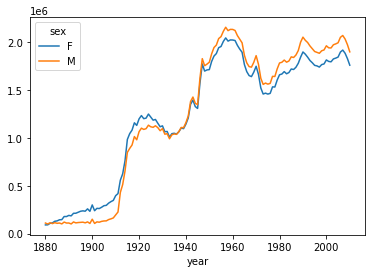

In [54]:
total_births.plot() # pandas에 시각화 기능 있음

In [55]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [57]:
names.groupby(['year', 'sex']).groups

{(1880, 'F'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], (1880, 'M'): [942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, ...], (1881, 'F'): [2000, 2001, 2

In [58]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [98]:
# 1880년 여아 비율
names[(names.year == 1880) & (names.sex == 'F')].births / names[(names.year == 1880) & (names.sex == 'F')].births.sum() # Series 형식
names[(names.year == 1880) & (names.sex == 'F')][['births']] / names[(names.year == 1880) & (names.sex == 'F')].births.sum() # DataFrame 형식

,births
0,0.077643
1,0.028618
2,0.022013
3,0.021309
4,0.019188
...,...
937,0.000055
938,0.000055
939,0.000055
940,0.000055


In [100]:
names['year'] == 1880
names['sex'] == 'F'
(names['year'] == 1880) & (names['sex'] == 'F')
names2 = names[(names['year'] == 1880) & (names['sex'] == 'F')]
names2

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
937,Ula,F,5,1880
938,Vannie,F,5,1880
939,Verona,F,5,1880
940,Vertie,F,5,1880


In [99]:
names['year'] == 2010
names['sex'] == 'F'
(names['year'] == 2010) & (names['sex'] == 'F')
names2010 = names[(names['year'] == 2010) & (names['sex'] == 'F')]
names2010

,name,sex,births,year
1656946,Isabella,F,22731,2010
1656947,Sophia,F,20477,2010
1656948,Emma,F,17179,2010
1656949,Olivia,F,16860,2010
1656950,Ava,F,15300,2010
...,...,...,...,...
1676639,Zylynn,F,5,2010
1676640,Zyniya,F,5,2010
1676641,Zyonnah,F,5,2010
1676642,Zyriana,F,5,2010


In [101]:
names2010.births / names2010.births.sum()

1656946    0.012923
1656947    0.011641
1656948    0.009766
1656949    0.009585
1656950    0.008698
             ...   
1676639    0.000003
1676640    0.000003
1676641    0.000003
1676642    0.000003
1676643    0.000003
Name: births, Length: 19698, dtype: float64

In [102]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [108]:
def add_prop(grp):
    grp['prop'] = grp['births']/grp['births'].sum()
    return grp

names.groupby(['year', 'sex']).apply(add_prop)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [110]:
def add_prop(grp):
    grp['prop'] = grp['births']/grp['births'].sum()
    return grp

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop) 
# 그룹화시 사용된 키들이 행 인덱스가 되지만, group_keys=False로 지정하여 행 인덱스가 되지 않게 설정

In [112]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [114]:
names[(names.year==1880) & (names.sex=='M')]

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
1995,Woodie,M,5,1880,0.000045
1996,Worthy,M,5,1880,0.000045
1997,Wright,M,5,1880,0.000045
1998,York,M,5,1880,0.000045


In [115]:
names[(names.year==2010) & (names.sex=='F')]

,name,sex,births,year,prop
1656946,Isabella,F,22731,2010,0.012923
1656947,Sophia,F,20477,2010,0.011641
1656948,Emma,F,17179,2010,0.009766
1656949,Olivia,F,16860,2010,0.009585
1656950,Ava,F,15300,2010,0.008698
...,...,...,...,...,...
1676639,Zylynn,F,5,2010,0.000003
1676640,Zyniya,F,5,2010,0.000003
1676641,Zyonnah,F,5,2010,0.000003
1676642,Zyriana,F,5,2010,0.000003


In [126]:
#상위 1000개 (1위~1000위) 이름에 대한 태어난 아이의 수

def getTop1000(grp):
#     print(grp.sort_values('births', ascending=False)[:1000])
#     print("="*50)
    return grp.sort_values('births', ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(getTop1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [129]:
top1000 = top1000.reset_index(drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [130]:
girls = top1000[top1000['sex']=='F']
boys = top1000[top1000['sex']=='M']

In [132]:
girls
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [133]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [135]:
total_births = top1000.pivot_table("births", index="year",
                            columns="name",
                            aggfunc=sum)

In [136]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [140]:
total_births[['Marilyn', 'Justin', 'Michael', 'Harry', 'John']]

name,Marilyn,Justin,Michael,Harry,John
year,,,,,
1880,NaN,8.0,354.0,2158.0,9701.0
1881,NaN,7.0,298.0,2002.0,8795.0
1882,NaN,NaN,321.0,2246.0,9597.0
1883,NaN,NaN,307.0,2116.0,8934.0
1884,NaN,6.0,373.0,2338.0,9427.0
...,...,...,...,...,...
2006,596.0,9956.0,22592.0,414.0,15140.0
2007,597.0,10019.0,21915.0,443.0,14405.0
2008,543.0,9330.0,20524.0,379.0,13273.0


<AxesSubplot:xlabel='year'>

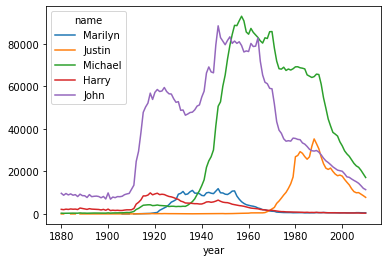

In [141]:
subset=total_births[['Marilyn', 'Justin', 'Michael', 'Harry', 'John']]
subset.plot()

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

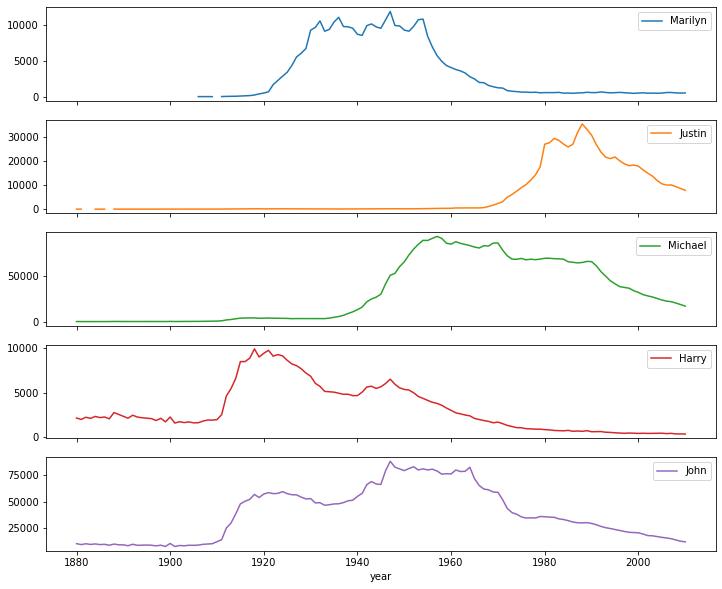

In [143]:
subset.plot(subplots=True, figsize=(12,10))

In [144]:
top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


In [145]:
table=top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<AxesSubplot:title={'center':'sum of tb by year and sex'}, xlabel='year'>

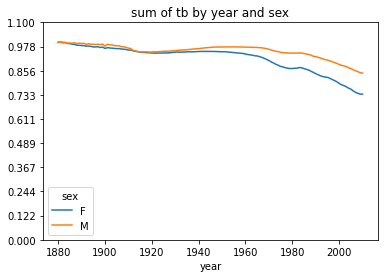

In [149]:
table.plot(title='sum of tb by year and sex', yticks=np.linspace(0, 1.1, 10))

In [150]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [156]:
df=boys[boys['year']==2010]
df

# prop 기준 내림차순 정렬
df.sort_values('prop', ascending=False)
# df['prop'].sort_values(ascending=False)
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum() # cumsum() : 누적합

In [157]:
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [158]:
prop_cumsum[:20]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
260887    0.097648
260888    0.105406
260889    0.112852
260890    0.120276
260891    0.127672
260892    0.135023
260893    0.142368
260894    0.149603
260895    0.156827
260896    0.164021
Name: prop, dtype: float64

In [160]:
# 50% 지점은 어딜까
prop_cumsum[:120] # 0번~116번에서 0.5를 조금 넘음

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
260992    0.498861
260993    0.500652
260994    0.502442
260995    0.504222
260996    0.505996
Name: prop, Length: 120, dtype: float64

In [163]:
prop_cumsum.searchsorted(0.5) # 비율이 50%가 막 넘었을 때 이름의 종류 개수가 117(116+1)개
# 2010년 태어난 남아 이름 중에서 상위 1000개의 이름을 추출했을 때, 50% 비율에 해당되는 아이 이름의 종류 : 117개

116

In [175]:
# 똑같은 방법으로 여아 계산
df2 = girls[girls.year==2010]
df2
df2.sort_values('prop', ascending=False)
prop_cumsum2 = df2['prop'].sort_values(ascending=False).cumsum() # cumsum() : 누적합
prop_cumsum2.searchsorted(0.5) # 246(245+1) 종류

245

In [171]:
df2.sort_values('prop', ascending=False)
prop_cumsum2 = df2['prop'].sort_values(ascending=False).cumsum() # cumsum() : 누적합

In [174]:
prop_cumsum2.searchsorted(0.5) # 246(245+1) 종류

245

In [176]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [177]:
in1900

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

In [196]:
# 1890~2010 성별에 따른 이름의 다양성 조사
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
    
    # print(group)
    # print("="*50)
diversity=top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [198]:
diversity2 = diversity.unstack()

In [199]:
diversity2

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


In [200]:
import matplotlib.pyplot as plt

In [203]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:title={'center':'Number of popluar names in top 50%'}, xlabel='year'>

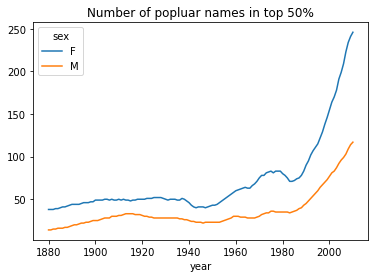

In [209]:
diversity2.plot(title='Number of popluar names in top 50%')

In [210]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [235]:
# 'Mary'[0]
# 'Mary'[-1]
# name 열의 이름 마지막 글자
names.name.str[-1]

def last_name(name):
    return name[-1]
names.name.apply(last_name)

# names['last_letter']=names.name.apply(lambda x: x[-1])

# def get_last_letter(x):
#     return x[-1]

# last_letters = names["name"].map(get_last_letter)
# last_letters.name = "last_letter"

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [234]:
# 이름 데이터 분석

In [237]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [250]:
# plotly 시각화
# 1: graph_objects 모듈(세세하게 시각화)
# 2: express 모듈(주로 사용)

# 시각화 과정
# 그래프 생성 (graph_objects / express) -> 그래프 업데이트(add_trace함수, update_함수들)

In [241]:
# 밑에가 에러나면 사용
# from IPython.display import HTML
# import plotly.express as px
# fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],title="A Figure Specified By express")
# HTML(fig.to_html())

In [243]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],title="A Figure Specified By express")
fig.show() # 에러발생시 HTML 함수로 시각화 결과 출력

In [246]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [249]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")
fig.show()
#fig.show() 에러발생시 아래와 같이 HTML 함수로 시각화 결과 출력
# HTML(fig.to_html())

In [251]:
import plotly.graph_objects as go

In [262]:
fig = go.Figure()

In [263]:
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))
fig.show()

In [261]:
fig.show()

In [264]:
import plotly.express as px


df = px.data.iris()


fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

In [265]:
fig.show()

In [266]:
fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

In [267]:
fig.show()

In [269]:
# ex를 이용한 시각화
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],width=600, height=400)

fig.show()

In [271]:
# graph_objects를 이용한 시각화
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])])

fig.update_layout(width=600,height=400)

fig.show()

In [275]:
# import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], title='제목')
fig.update_layout(
    width=600,
    height=400,
    margin_l=50,
    margin_r=50,
    margin_b=100,
    margin_t=100,

    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [281]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], title="Title 설정하기")

fig.update_layout(
                 title_x = 0.5,
                 # title_y = 0.5,
                 title_y = 0.9,
                 title_font_size=25,
                 title_xanchor = "center",
                 title_yanchor = "middle")

fig.show()

In [282]:
import plotly.express as px

fig = px.pie(values=[4500, 2500, 1053, 500], names=['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen'])

fig.show()

In [ ]:
# 1. 최근 Steven이라는 이름은 최근 미국에서 인기있는 이름인가?
# 2. '아이폰 출시(2007년6월)' 이후 미국에서 스티브라는 출생아 이름이 증가했는가?
# 3. 1960년 전까지 미국에서 TOP10순위 안에들정도로 인기있던 이름이, 1960년대 이후부터 왜 인기가 줄곧 시들해졌을까?
# 4. 여아/남아 모음의 비율? 성별과 관련이 있을까?
# 5. 아이의 이름에 가장 많이 등장하는 철자? 적게 등장하는 철자? 남자/여자 아이에서 가장 많이 등장하는 철자?
# 6. 과거에 인기 있던 이름 중에 최근에 인기가 없는 이름?
# 7. 작명인 입장 - 이름의 트렌드?

In [283]:
# 1. 최근 Steven이라는 이름은 최근 미국에서 인기있는 이름인가?
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [353]:
steven = names[names.name=='Steven'].groupby('year').sum()[['births']]
steven

,births
year,
1880,17
1881,15
1882,22
1883,13
1884,20
...,...
2006,4815
2007,4549
2008,4226


<AxesSubplot:xlabel='year'>

<Figure size 432x288 with 0 Axes>

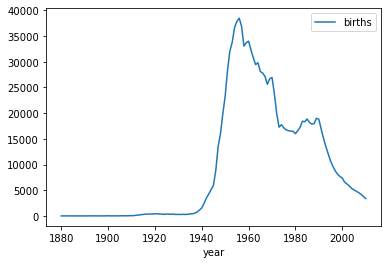

In [354]:
import matplotlib.pyplot as plt
fig = plt.figure()
steven.plot()

In [357]:
# 2. '아이폰 출시(2007년6월)' 이후 미국에서 스티브라는 출생아 이름이 증가했는가?
steve = names[(names.name=='Steve') & (names.year > 2000)].groupby(['name', 'year']).sum()[['births']]
steve

births
name  year        
Steve 2001     623
      2002     543
      2003     561
      2004     484
      2005     475
      2006     469
      2007     446
      2008     421
      2009     415
      2010     277

<AxesSubplot:xlabel='name,year'>

<Figure size 432x288 with 0 Axes>

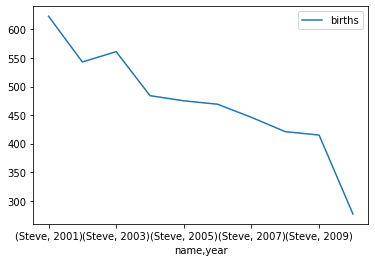

In [358]:
import matplotlib.pyplot as plt
fig = plt.figure()
steve.plot()

In [337]:
# 3. 1960년 전까지 미국에서 TOP10순위 안에들정도로 인기있던 이름이, 1960년대 이후부터 왜 인기가 줄곧 시들해졌을까?
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [351]:
names[names.year<=1960].groupby('name').sum().sort_values('births', ascending=False)[['births']][:10]

,births
name,
Mary,3466436
John,3281187
James,3233114
Robert,3163595
William,2664072
Richard,1713680
Charles,1654699
David,1606257
Michael,1399770


In [352]:
names[names.year>1960].groupby('name').sum().sort_values('births', ascending=False)[['births']][:10]

,births
name,
Michael,2865603
David,1932491
James,1839657
Christopher,1837918
John,1780710
Robert,1624455
Matthew,1427528
Jennifer,1398319
William,1338320


In [ ]:
# 4. 여아/남아 모음의 비율? 성별과 관련이 있을까?
# 5. 아이의 이름에 가장 많이 등장하는 철자? 적게 등장하는 철자? 남자/여자 아이에서 가장 많이 등장하는 철자?
# 6. 과거에 인기 있던 이름 중에 최근에 인기가 없는 이름?
# 7. 작명인 입장 - 이름의 트렌드?